In [1]:
#Importing the various dependencies
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sci

#Displaying all the columns in the table
pd.set_option('display.max_columns', None)

In [2]:
train_label = pd.read_csv(f'data/training_set_labels.csv')
train_feature = pd.read_csv(f'data/training_set_features.csv')

In [3]:
train_label.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [4]:
train_feature.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [5]:
train = train_feature.merge(on = 'respondent_id', right = train_label)

In [6]:
train.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,55 - 64 Years,< 12 Years,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,35 - 44 Years,12 Years,White,Male,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,18 - 34 Years,College Graduate,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,65+ Years,12 Years,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,45 - 54 Years,Some College,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [22]:
target = [x for x in train_label.columns if x != 'respondent_id']
target

['h1n1_vaccine', 'seasonal_vaccine']

In [33]:
var_num = [x for x in train.columns  if x not in target and \
           train[x].dtypes != 'object' and x !='respondent_id' and \
            len(train[x].unique()) > 20]
var_num

[]

In [34]:
var_obj = [x for x in train.columns if train[x].dtypes == 'object']

var_obj

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [39]:
var_dis = [x for x in train.columns if x not in set(var_obj + var_num + target) and \
           x != 'respondent_id']

var_dis

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [40]:
var_na = [x for x in train.columns if train[x].isna().any()]

var_na

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'education',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'household_adults',
 'household_children',
 'employment_industry',
 'employment_occupation']

Analyzing Variables with Null values

In [42]:
train_na = train[var_na]

In [46]:
for x in var_na: 
    train_na[x+'_na'] =np.where(train[x].isnull(), 1, 0)

train_na.head()

,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,doctor_recc_h1n1,doctor_recc_seasonal,chronic_med_condition,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,education,income_poverty,marital_status,rent_or_own,employment_status,household_adults,household_children,employment_industry,employment_occupation,h1n1_concern_na,h1n1_knowledge_na,behavioral_antiviral_meds_na,behavioral_avoidance_na,behavioral_face_mask_na,behavioral_wash_hands_na,behavioral_large_gatherings_na,behavioral_outside_home_na,behavioral_touch_face_na,doctor_recc_h1n1_na,doctor_recc_seasonal_na,chronic_med_condition_na,child_under_6_months_na,health_worker_na,health_insurance_na,opinion_h1n1_vacc_effective_na,opinion_h1n1_risk_na,opinion_h1n1_sick_from_vacc_na,opinion_seas_vacc_effective_na,opinion_seas_risk_na,opinion_seas_sick_from_vacc_na,education_na,income_poverty_na,marital_status_na,rent_or_own_na,employment_status_na,household_adults_na,household_children_na,employment_industry_na,employment_occupation_na
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,2.0,< 12 Years,Below Poverty,Not Married,Own,Not in Labor Force,0.0,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,4.0,4.0,4.0,2.0,4.0,12 Years,Below Poverty,Not Married,Rent,Employed,0.0,0.0,pxcmvdjn,xgwztkwe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,1.0,0.0,0.0,NaN,3.0,1.0,1.0,4.0,1.0,2.0,College Graduate,"<= $75,000, Above Poverty",Not Married,Own,Employed,2.0,0.0,rucpziij,xtkaffoo,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,3.0,3.0,5.0,5.0,4.0,1.0,12 Years,Below Poverty,Not Married,Rent,Not in Labor Force,0.0,0.0,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,NaN,3.0,3.0,2.0,3.0,1.0,4.0,Some College,"<= $75,000, Above Poverty",Married,Own,Employed,1.0,0.0,wxleyezf,emcorrxb,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [47]:
train_na.drop(var_na, axis = 1, inplace = True )
train_na.head()

,h1n1_concern_na,h1n1_knowledge_na,behavioral_antiviral_meds_na,behavioral_avoidance_na,behavioral_face_mask_na,behavioral_wash_hands_na,behavioral_large_gatherings_na,behavioral_outside_home_na,behavioral_touch_face_na,doctor_recc_h1n1_na,doctor_recc_seasonal_na,chronic_med_condition_na,child_under_6_months_na,health_worker_na,health_insurance_na,opinion_h1n1_vacc_effective_na,opinion_h1n1_risk_na,opinion_h1n1_sick_from_vacc_na,opinion_seas_vacc_effective_na,opinion_seas_risk_na,opinion_seas_sick_from_vacc_na,education_na,income_poverty_na,marital_status_na,rent_or_own_na,employment_status_na,household_adults_na,household_children_na,employment_industry_na,employment_occupation_na
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


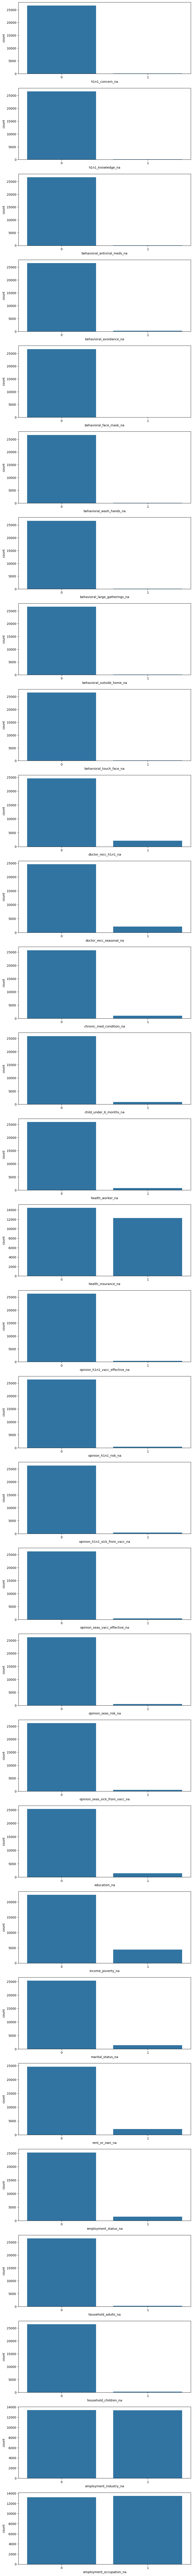

In [52]:
num_columns = len(train_na.columns)

# Adjust nrows and ncols based on the number of columns you have
fig, axes = plt.subplots(nrows=num_columns, ncols=1, figsize=(10, 5*num_columns))


for i, x in enumerate(train_na.columns):
    sns.countplot(data= train_na, x = x, ax=axes[i])

Analyzing object Variables

In [ ]:
def rare_analysis(data, col):
    tmp = data.copy()
    
    tmp_df = pd.Series(tmp[col].value_counts() / len(tmp)).re

In [56]:
train[x].value_counts()/ len(train)

age_group
65+ Years        0.256225
55 - 64 Years    0.208297
45 - 54 Years    0.196128
18 - 34 Years    0.195267
35 - 44 Years    0.144082
Name: count, dtype: float64
education
College Graduate    0.378066
Some College        0.263714
12 Years            0.217059
< 12 Years          0.088479
Name: count, dtype: float64
race
White                0.794623
Black                0.079305
Hispanic             0.065713
Other or Multiple    0.060359
Name: count, dtype: float64
sex
Female    0.593777
Male      0.406223
Name: count, dtype: float64
income_poverty
<= $75,000, Above Poverty    0.478414
> $75,000                    0.254989
Below Poverty                0.100985
Name: count, dtype: float64
marital_status
Married        0.507545
Not Married    0.439735
Name: count, dtype: float64
rent_or_own
Own     0.701539
Rent    0.222002
Name: count, dtype: float64
employment_status
Employed              0.507732
Not in Labor Force    0.383083
Unemployed            0.054405
Name: count, dtype: fl